In [3]:
## Time Series


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://assets.datacamp.com/production/course_1639/datasets/NOAA_QCLCD_2011_hourly_13904.txt', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


In [5]:
column_labels_str = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

column_labels_list = column_labels_str.split(',')

df.columns = column_labels_list


list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']


df_cleaned= df.drop(list_to_drop, axis = 'columns')


print(df_cleaned.head())


    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101    53           12        OVC045      10.00             51   
1  13904  20110101   153           12        OVC049      10.00             51   
2  13904  20110101   253           12        OVC060      10.00             51   
3  13904  20110101   353           12        OVC065      10.00             50   
4  13904  20110101   453           12        BKN070      10.00             50   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             38          3.1              15          -9.4   
1         10.6             37          3.0              14         -10.0   
2         10.6             37          2.9              13         -10.6   
3         10.0             38          3.1              17          -8.3   
4         10.0             37          2.8              15          -9.4   

  relative_humidity wind_speed wind_direction station_pr

In [6]:
# Convert the date column to string: df_dropped['date']
df_cleaned['date'] = df_cleaned['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_cleaned['Time'] = df_cleaned['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_cleaned['date'] + df_cleaned['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_cleaned.set_index(date_times)

# Print the output of df_clean.head()
print(df_clean.head())


                      Wban      date  Time  StationType sky_condition  \
2011-01-01 00:53:00  13904  20110101  0053           12        OVC045   
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 00:53:00      10.00             51         10.6             38   
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 00:53:00          3.1

In [7]:
#errors='coerce' for filling null values
df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors='coerce')
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')


In [8]:
df_clean

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.0,51.0,10.6,38,3.1,15.0,-9.4,24,15.0,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.0,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.0,51.0,10.6,37,2.9,13.0,-10.6,22,15.0,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.0,50.0,10.0,38,3.1,17.0,-8.3,27,7.0,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.0,50.0,10.0,37,2.8,15.0,-9.4,25,11.0,020,29.51,30.04
2011-01-01 05:53:00,13904,20110101,0553,12,BKN065,10.0,49.0,9.4,37,2.8,17.0,-8.3,28,6.0,010,29.53,30.06
2011-01-01 06:53:00,13904,20110101,0653,12,BKN065,10.0,48.0,8.9,37,2.5,17.0,-8.3,29,7.0,360,29.57,30.10
2011-01-01 07:53:00,13904,20110101,0753,12,SCT060,10.0,48.0,8.9,37,2.5,17.0,-8.3,29,11.0,020,29.59,30.12
2011-01-01 08:53:00,13904,20110101,0853,12,FEW060,10.0,51.0,10.6,38,3.3,16.0,-8.9,25,15.0,020,29.62,30.16
2011-01-01 09:53:00,13904,20110101,0953,12,FEW060,10.0,54.0,12.2,40,4.2,16.0,-8.9,22,18.0,010,29.65,30.19


In [9]:
df_clean.index


DatetimeIndex(['2011-01-01 00:53:00', '2011-01-01 01:53:00',
               '2011-01-01 02:53:00', '2011-01-01 03:53:00',
               '2011-01-01 04:53:00', '2011-01-01 05:53:00',
               '2011-01-01 06:53:00', '2011-01-01 07:53:00',
               '2011-01-01 08:53:00', '2011-01-01 09:53:00',
               ...
               '2011-12-31 14:53:00', '2011-12-31 15:53:00',
               '2011-12-31 16:53:00', '2011-12-31 17:53:00',
               '2011-12-31 18:53:00', '2011-12-31 19:53:00',
               '2011-12-31 20:53:00', '2011-12-31 21:53:00',
               '2011-12-31 22:53:00', '2011-12-31 23:53:00'],
              dtype='datetime64[ns]', length=10337, freq=None)

In [10]:
print(type(df_clean))
print(type(df_clean.index))
df.info()


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 44 columns):
Wban                            10337 non-null int64
date                            10337 non-null int64
Time                            10337 non-null int64
StationType                     10337 non-null int64
sky_condition                   10337 non-null object
sky_conditionFlag               10337 non-null object
visibility                      10325 non-null object
visibilityFlag                  10337 non-null object
wx_and_obst_to_vision           10337 non-null object
wx_and_obst_to_visionFlag       10337 non-null object
dry_bulb_faren                  10337 non-null object
dry_bulb_farenFlag              10337 non-null object
dry_bulb_cel                    10337 non-null object
dry_bulb_celFlag                10337 non-null object
wet_bulb_faren                  10337 non-null 

/Users/davidxbuck/anaconda3/envs/MachineLearning2/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


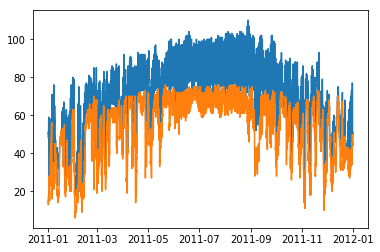

In [11]:
plt.plot(df_clean['dry_bulb_faren'])
plt.plot(df_clean['dew_point_faren'])
plt.show()


In [13]:
temperature = df_clean['dry_bulb_faren']
march_apr = temperature['2011-03':'2011-04'] # data of March/April
print(march_apr.shape)
march01 = temperature['2011-03-01'] # data of March 1st only
print(march01.shape)
march_apr.iloc[-4:]


(1764,)
(24,)


2011-04-30 21:24:00    79.0
2011-04-30 21:53:00    79.0
2011-04-30 22:53:00    79.0
2011-04-30 23:53:00    79.0
Name: dry_bulb_faren, dtype: float64

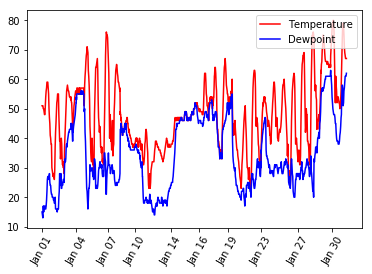

In [14]:

jan = temperature['2011-01']
dates = jan.index[::96]
labels = dates.strftime('%b %d') # Make formatted labels


plt.plot(temperature['2011-01'], color='red',
label='Temperature')
dewpoint = df_clean['dew_point_faren']
plt.plot(dewpoint['2011-01'], color='blue',
label='Dewpoint')
plt.legend(loc='upper right')
plt.xticks(dates, labels, rotation=60)
plt.show()


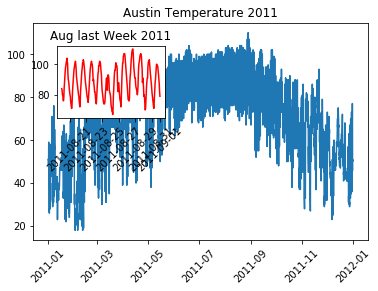

In [15]:
# Slice temperature from Jun. 2011 : view
view = temperature['2011-08-20':'2011-08-31']

# Plot the entire series 
plt.plot(temperature)
plt.xticks(rotation=45)
plt.title('Austin Temperature 2011')

# Specify the axes
plt.axes([0.18, 0.55,0.25, 0.25])

# Plot the sliced series in red using the current axes
plt.plot(view, color='red')
plt.xticks(rotation=45)
plt.title('Aug last Week 2011')
plt.show()


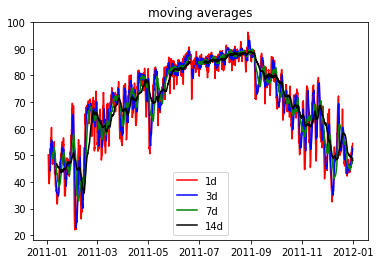

In [20]:
#
# Calculate moving averages
#
df_clean['1d'] = df_clean.rolling(window=24)['dry_bulb_faren'].mean()
df_clean['3d'] = df_clean.rolling(window=24*3)['dry_bulb_faren'].mean()
df_clean['7d'] = df_clean.rolling(window=24*7)['dry_bulb_faren'].mean()
df_clean['14d'] = df_clean.rolling(window=24*14)['dry_bulb_faren'].mean()
df_clean.head()

plt.plot(df_clean['1d'], color='red', label='1d' )
plt.plot(df_clean['3d'], color='blue', label='3d' )
plt.plot(df_clean['7d'], color='green', label='7d' )
plt.plot(df_clean['14d'], color='black', label='14d' )

plt.legend(loc='lower center')
plt.title('moving averages')
plt.show()

